importing libraries

In [323]:
#Libraries required:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

collect and read dataset

In [325]:
#reading the dataframe

import pandas as pd
df = pd.read_csv('/content/patient_data.csv')
df.head()
display(df)

,C,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
0,Male,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
1,Female,18-34,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
2,Male,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
3,Female,35-50,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
4,Male,51-64,Yes,No,No,Mild,No,No,No,<1 Year,111 - 120,81 - 90,No,HYPERTENSION (Stage-1)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,Female,35-50,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1821,Male,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1822,Female,51-64,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL
1823,Male,65+,Yes,No,No,Sever,No,No,No,>5 Years,111 - 120,70 - 80,No,NORMAL


Data Preparation

handling missing values

In [327]:
#total records(rows) & columns present in the dataset
df.shape
df.rename(columns= {'C':'Gender'}, inplace=True)

In [329]:
#checking if any null values
df.isnull().sum()


,0
Gender,0
Age,0
History,0
Patient,0
TakeMedication,0
Severity,0
BreathShortness,0
VisualChanges,0
NoseBleeding,0
Whendiagnoused,0


In [331]:
# Strip leading/trailing spaces from column names
df.columns = df.columns.str.strip()

# Display cleaned column names
print("Cleaned Column Names:")
print(df.columns.tolist())


Cleaned Column Names:
['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity', 'BreathShortness', 'VisualChanges', 'NoseBleeding', 'Whendiagnoused', 'Systolic', 'Diastolic', 'ControlledDiet', 'Stages']


In [333]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1825 non-null   object
 1   Age              1825 non-null   object
 2   History          1825 non-null   object
 3   Patient          1825 non-null   object
 4   TakeMedication   1825 non-null   object
 5   Severity         1825 non-null   object
 6   BreathShortness  1825 non-null   object
 7   VisualChanges    1825 non-null   object
 8   NoseBleeding     1825 non-null   object
 9   Whendiagnoused   1825 non-null   object
 10  Systolic         1825 non-null   object
 11  Diastolic        1825 non-null   object
 12  ControlledDiet   1825 non-null   object
 13  Stages           1825 non-null   object
dtypes: object(14)
memory usage: 199.7+ KB


In [335]:
#

In [337]:
#duplicate records
df.duplicated().sum()

np.int64(476)

handling categorical values

In [339]:
# Function to convert range or '130+' to a numeric value
def range_to_mid(val):
    val = str(val).strip()
    if '+' in val:
        return int(val.replace('+', '').strip())
    elif '-' in val:
        nums = val.split('-')
        return (int(nums[0].strip()) + int(nums[1].strip())) // 2
    else:
        return pd.to_numeric(val, errors='coerce')

# Apply conversion to both columns
df['Systolic'] = df['Systolic'].apply(range_to_mid)
df['Diastolic'] = df['Diastolic'].apply(range_to_mid)

# Show result
print("Converted 'Systolic' and 'Diastolic' values:")
print(df[['Systolic', 'Diastolic']].head())


Converted 'Systolic' and 'Diastolic' values:
   Systolic  Diastolic
0       115         85
1       115         85
2       115         85
3       115         85
4       115         85


In [341]:
# Show all unique values in the column to debug mapping
print("Unique values in 'Whendiagnoused':")
print(df['Whendiagnoused'].unique())


Unique values in 'Whendiagnoused':
['<1 Year' '1 - 5 Years' '>5 Years']


In [343]:
df['Whendiagnoused'].fillna('<1 Year', inplace=True)
print("Values after fillna:")
print(df['Whendiagnoused'].head(10))

Values after fillna:
0    <1 year
1    <1 year
2    <1 year
3    <1 year
4    <1 year
5    <1 year
6    <1 year
7    <1 year
8    <1 year
9    <1 year
Name: Whendiagnoused, dtype: object


In [345]:
df['Whendiagnoused'] = df['Whendiagnoused'].apply(
    lambda x: x.strip().lower() if isinstance(x, str) else x
)


In [347]:
#duplicate records
df.duplicated().sum()

np.int64(0)

In [349]:
#keeping the first duplicates and dropping the next occuring duplicate record
df.drop_duplicates(keep='first',inplace=True)

In [351]:
#information of the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1349 entries, 0 to 1600
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           1349 non-null   object
 1   Age              1349 non-null   object
 2   History          1349 non-null   object
 3   Patient          1349 non-null   object
 4   TakeMedication   1349 non-null   object
 5   Severity         1349 non-null   object
 6   BreathShortness  1349 non-null   object
 7   VisualChanges    1349 non-null   object
 8   NoseBleeding     1349 non-null   object
 9   Whendiagnoused   1349 non-null   object
 10  Systolic         1349 non-null   int64 
 11  Diastolic        1349 non-null   int64 
 12  ControlledDiet   1349 non-null   object
 13  Stages           1349 non-null   object
dtypes: int64(2), object(12)
memory usage: 158.1+ KB


In [353]:
#statistical description of the numerical data

df.describe()

,Systolic,Diastolic
count,1349.000000,1349.000000
mean,120.593032,89.762787
std,6.170523,7.593341
min,100.000000,75.000000
25%,115.000000,85.000000
50%,115.000000,85.000000
75%,125.000000,95.000000
max,130.000000,130.000000


In [355]:
df['Stages'].unique()

array(['HYPERTENSION (Stage-1)', 'HYPERTENSION (Stage-2)',
       'HYPERTENSIVE CRISIS', 'NORMAL'], dtype=object)

In [357]:
df['Stages'].replace({'HYPERTENSIVE CRISI':'HYPERTENSIVE CRISIS',
                      'HYPERTENSION (Stage-2).':'HYPERTENSION (Stage-2)'},
                     inplace=True)

In [359]:
df['Stages'].unique()

array([0, 1, 4, 2, 3, 5])

In [370]:
from sklearn.preprocessing import LabelEncoder

# Revert 'Age' to original categorical values (assuming the original df is available or reload it)
# As we don't have the original df state, I will reload it here to ensure correct age mapping.
df = pd.read_csv('/content/patient_data.csv')
df.rename(columns= {'C':'Gender'}, inplace=True)

# Handle the systolic and diastolic columns again as we reloaded the data
def range_to_mid(val):
    val = str(val).strip()
    if '+' in val:
        return int(val.replace('+', '').strip())
    elif '-' in val:
        nums = val.split('-')
        return (int(nums[0].strip()) + int(nums[1].strip())) // 2
    else:
        return pd.to_numeric(val, errors='coerce')

df['Systolic'] = df['Systolic'].apply(range_to_mid)
df['Diastolic'] = df['Diastolic'].apply(range_to_mid)

# Handle Whendiagnoused again
df['Whendiagnoused'].fillna('<1 Year', inplace=True)
df['Whendiagnoused'] = df['Whendiagnoused'].apply(
    lambda x: x.strip().lower() if isinstance(x, str) else x
)
diagnosis_map = {
    '<1 year': 0,
    '1-5 years': 1,
    '>5 years': 2,
    'less than 1 year': 0,
    'more than 5 years': 2,
    '1 - 5 years': 1
}
df['Whendiagnoused'] = df['Whendiagnoused'].map(diagnosis_map)


# Apply numerical mapping to 'Age' *before* other label encoding
age_mapping = {
    '18-34': 26,
    '35-50': 42.5,
    '51-64': 57.5,
    '65+': 70
}
df['Age'] = df['Age'].map(age_mapping)

# Drop duplicates again as we reloaded the data
df.drop_duplicates(keep='first',inplace=True)


# Identify columns to label encode (excluding 'Age', 'Systolic', 'Diastolic', 'Whendiagnoused')
categorical_cols_for_label_encoding = ['Gender','Severity','History','Patient','TakeMedication',   'BreathShortness','VisualChanges','NoseBleeding','ControlledDiet','Stages']

label_encoder = LabelEncoder()
for col in categorical_cols_for_label_encoding:
   df[col] = label_encoder.fit_transform(df[col])

In [371]:
x=df.drop('Stages',axis=1)
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,26.0,1,0,0,0,0,0,1,0,115,85,0
1,0,26.0,1,0,0,0,0,0,1,0,115,85,0
2,1,42.5,1,0,0,0,0,0,1,0,115,85,0
3,0,42.5,1,0,0,0,0,0,1,0,115,85,0
4,1,57.5,1,0,0,0,0,0,1,0,115,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,42.5,1,0,0,2,0,0,1,2,115,75,0
1597,1,57.5,1,0,0,2,0,0,1,2,115,75,0
1598,0,57.5,1,0,0,2,0,0,1,2,115,75,0
1599,1,70.0,1,0,0,2,0,0,1,2,115,75,0


In [365]:
df.describe()

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet,Stages
count,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000,1349.000000
mean,0.500371,48.455152,0.958488,0.472202,0.926612,1.065975,0.510749,0.523351,1.177168,0.993328,120.593032,89.762787,0.472202,1.421053
std,0.500185,16.328452,0.199546,0.499412,0.810600,0.783324,0.500070,0.499640,0.664184,0.822955,6.170523,7.593341,0.499412,1.787868
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,75.000000,0.000000,0.000000
25%,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,115.000000,85.000000,0.000000,0.000000
50%,1.000000,42.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,115.000000,85.000000,0.000000,1.000000
75%,1.000000,57.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,125.000000,95.000000,1.000000,4.000000
max,1.000000,70.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,130.000000,130.000000,1.000000,5.000000


UNIVARIATE Analysis

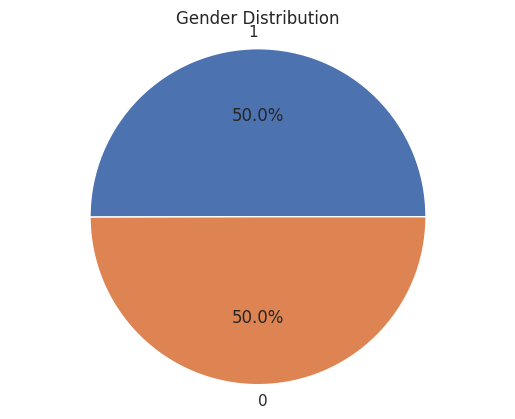

In [372]:
gender_counts = df['Gender'].value_counts()
#plotting the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

**The Male count is equal to the Female Count**

In [373]:
def univariate_analysis(col):
  value_counts=df[col].value_counts(normalize=True)*100
  print(f"\nValue counts for {col}:\n", df[col].value_counts())
  print(f"\nPercentage for {col} :\n",value_counts)

  plt.figure(figsize=(5,3))
  plt.pie(value_counts,labels=value_counts.index,autopct='%1.1f%%')
  plt.title(f'{col} distribution')
  plt.show()


Value counts for Gender:
 Gender
1    675
0    674
Name: count, dtype: int64

Percentage for Gender :
 Gender
1    50.037064
0    49.962936
Name: proportion, dtype: float64


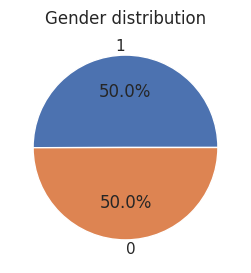


Value counts for Severity:
 Severity
1    516
2    461
0    372
Name: count, dtype: int64

Percentage for Severity :
 Severity
1    38.250556
2    34.173462
0    27.575982
Name: proportion, dtype: float64


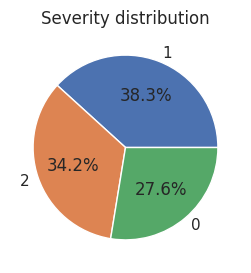


Value counts for History:
 History
1    1293
0      56
Name: count, dtype: int64

Percentage for History :
 History
1    95.848777
0     4.151223
Name: proportion, dtype: float64


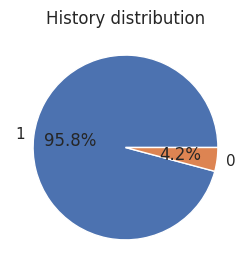


Value counts for Patient:
 Patient
0    712
1    637
Name: count, dtype: int64

Percentage for Patient :
 Patient
0    52.779837
1    47.220163
Name: proportion, dtype: float64


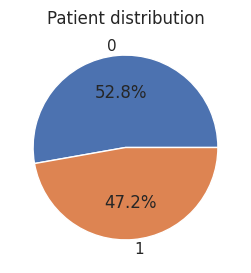


Value counts for TakeMedication:
 TakeMedication
0    496
1    456
2    397
Name: count, dtype: int64

Percentage for TakeMedication :
 TakeMedication
0    36.767976
1    33.802817
2    29.429207
Name: proportion, dtype: float64


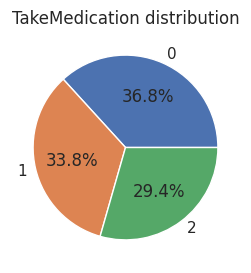


Value counts for BreathShortness:
 BreathShortness
1    689
0    660
Name: count, dtype: int64

Percentage for BreathShortness :
 BreathShortness
1    51.07487
0    48.92513
Name: proportion, dtype: float64


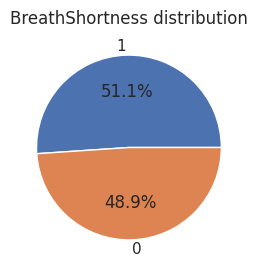


Value counts for VisualChanges:
 VisualChanges
1    706
0    643
Name: count, dtype: int64

Percentage for VisualChanges :
 VisualChanges
1    52.335063
0    47.664937
Name: proportion, dtype: float64


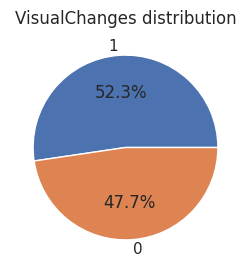


Value counts for NoseBleeding:
 NoseBleeding
1    712
2    438
0    199
Name: count, dtype: int64

Percentage for NoseBleeding :
 NoseBleeding
1    52.779837
2    32.468495
0    14.751668
Name: proportion, dtype: float64


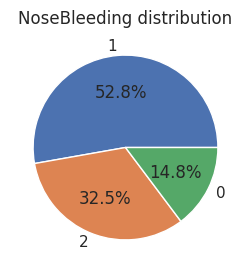


Value counts for ControlledDiet:
 ControlledDiet
0    712
1    637
Name: count, dtype: int64

Percentage for ControlledDiet :
 ControlledDiet
0    52.779837
1    47.220163
Name: proportion, dtype: float64


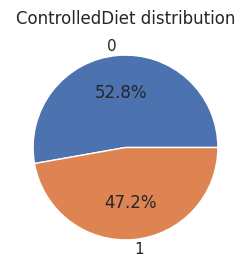


Value counts for Stages:
 Stages
0    600
1    396
4    239
5    112
2      1
3      1
Name: count, dtype: int64

Percentage for Stages :
 Stages
0    44.477391
1    29.355078
4    17.716827
5     8.302446
2     0.074129
3     0.074129
Name: proportion, dtype: float64


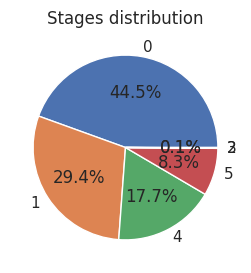

In [374]:
categorical_cols=['Gender','Severity','History','Patient','TakeMedication','BreathShortness','VisualChanges','NoseBleeding','ControlledDiet','Stages']
for col in categorical_cols:
  univariate_analysis(col)

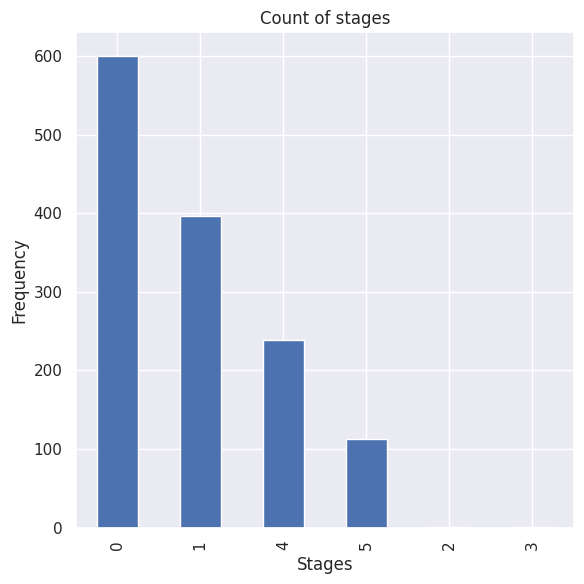

In [375]:
plt.figure(figsize=(6,6))
frequency = df['Stages'].value_counts()
frequency.plot(kind='bar')

plt.xlabel('Stages')
plt.ylabel('Frequency')
plt.title('Count of stages')
plt.tight_layout()

plt.show()

most of the people are in hypertension (stage0)

In [376]:
# Automatically detect column types
cat_cols = df.select_dtypes(include='object').columns.tolist()

# Plot settings
cols = 2
rows = 2
plots_per_fig = rows * cols
total_plots = len(cat_cols)

for i in range(0, total_plots, plots_per_fig):
    fig, axes = plt.subplots(rows, cols, figsize=(10, 6))  # smaller plot size
    axes = axes.flatten()

    for j, col in enumerate(cat_cols[i:i + plots_per_fig]):
        sns.countplot(x=col, data=df, ax=axes[j], palette='viridis')
        axes[j].set_title(f'Count Plot of {col}')
        axes[j].tick_params(axis='x', rotation=0)  # keep labels straight

    # Hide any unused subplots
    for k in range(j + 1, plots_per_fig):
        fig.delaxes(axes[k])

    plt.tight_layout()
    plt.show()


**most of the people are in HYPERTENSION (Stage 0)

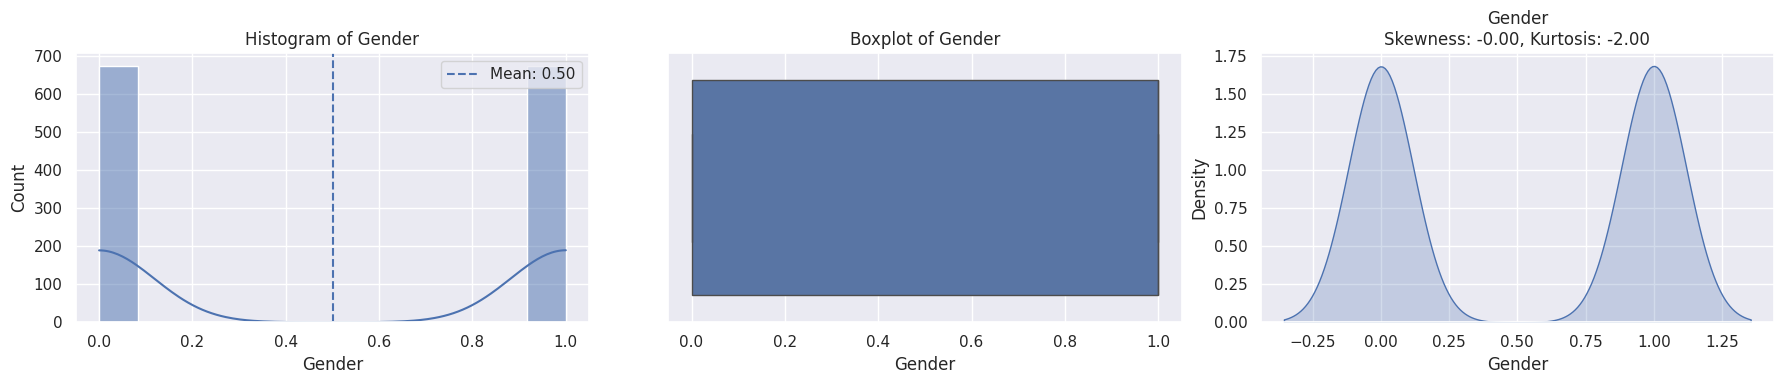

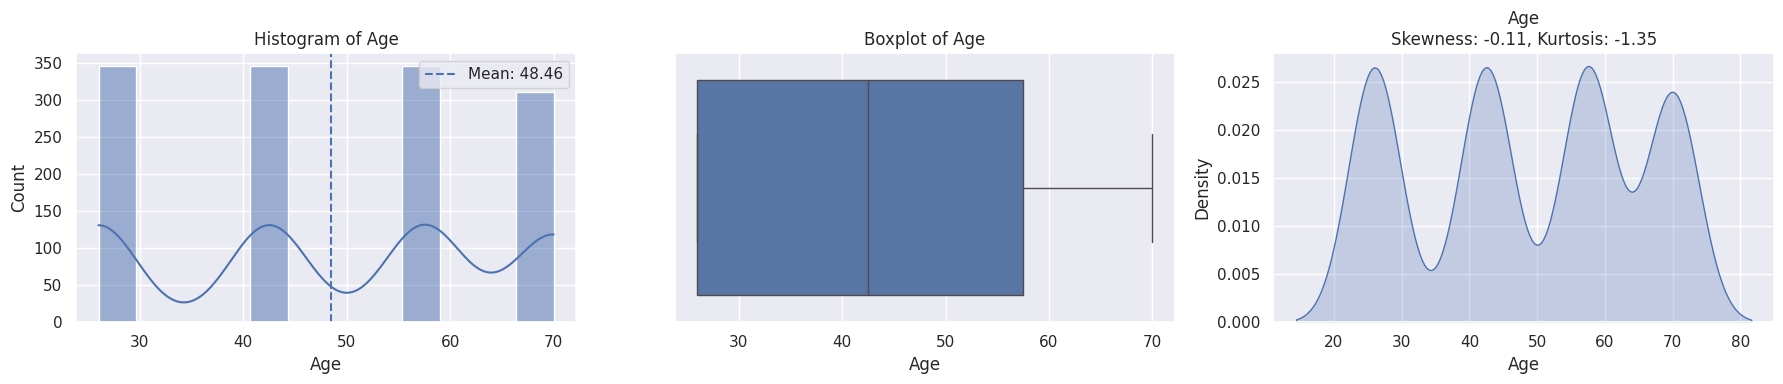

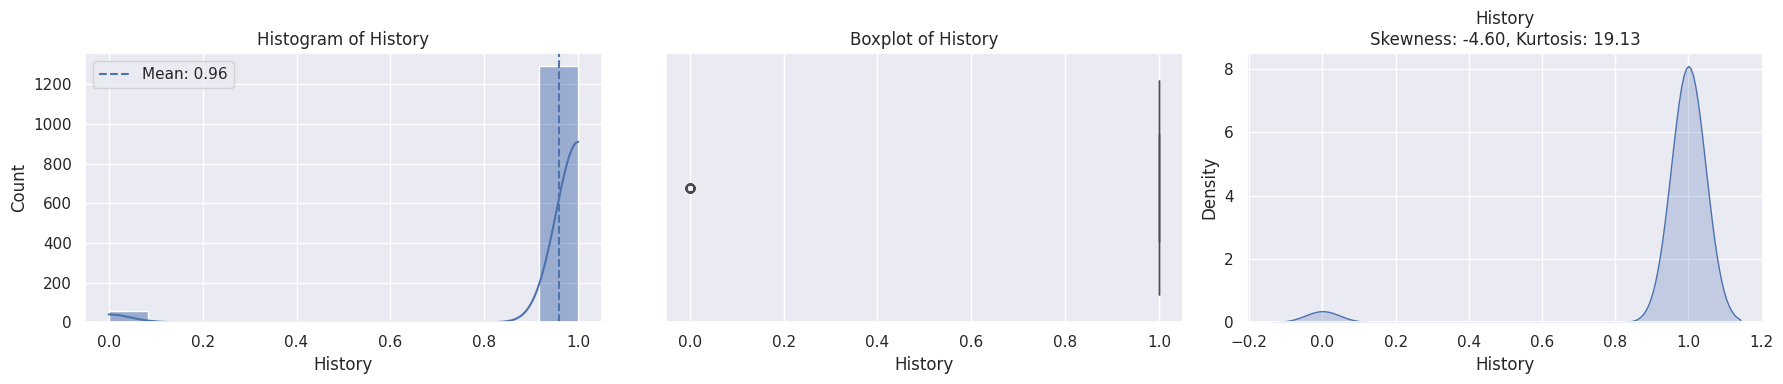

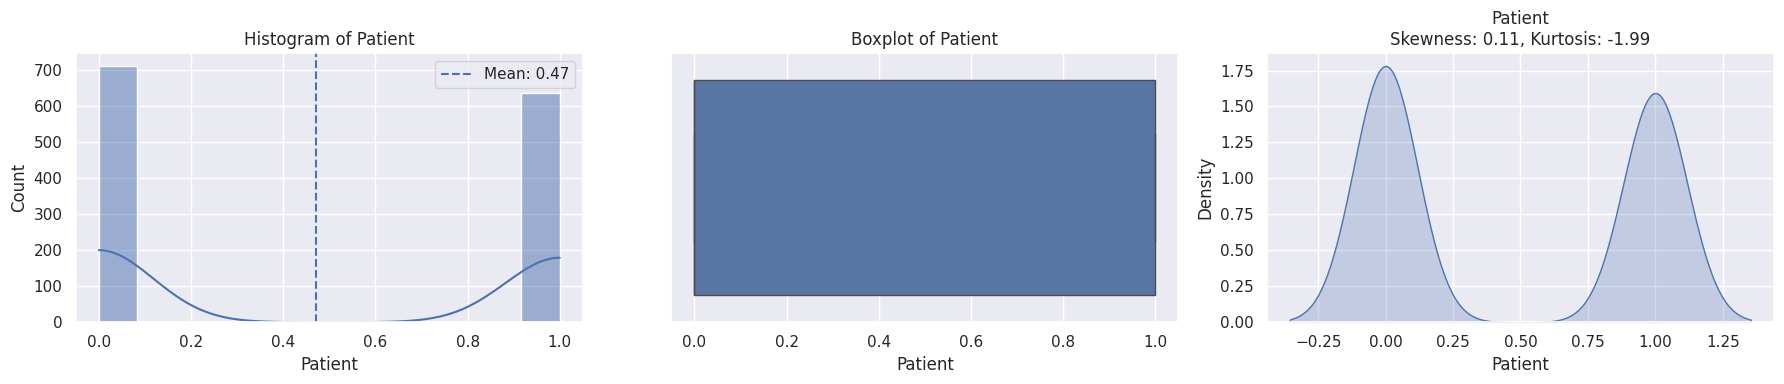

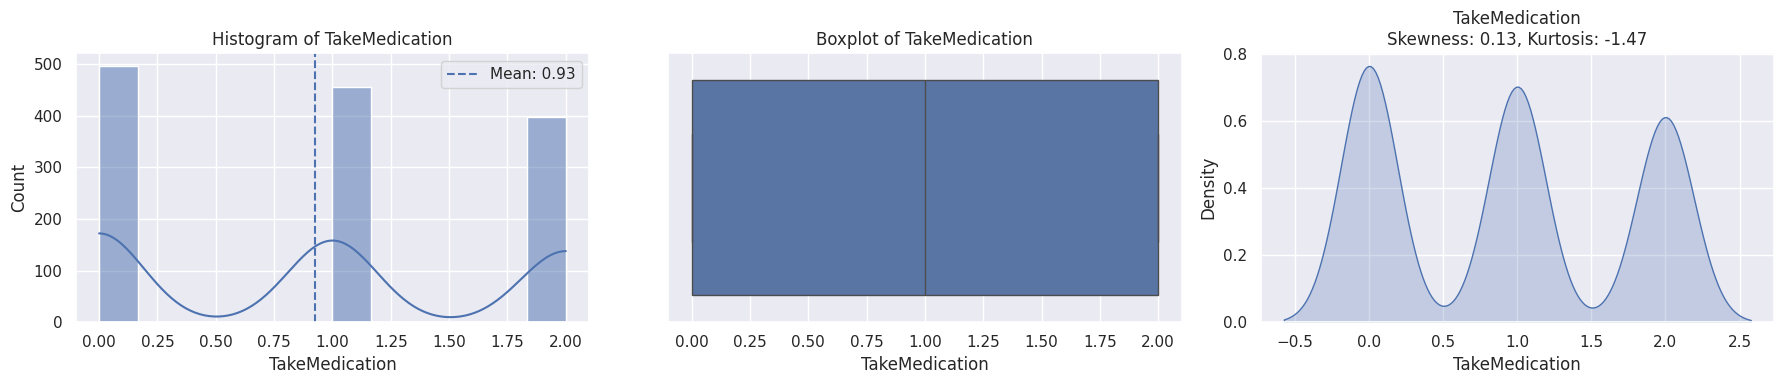

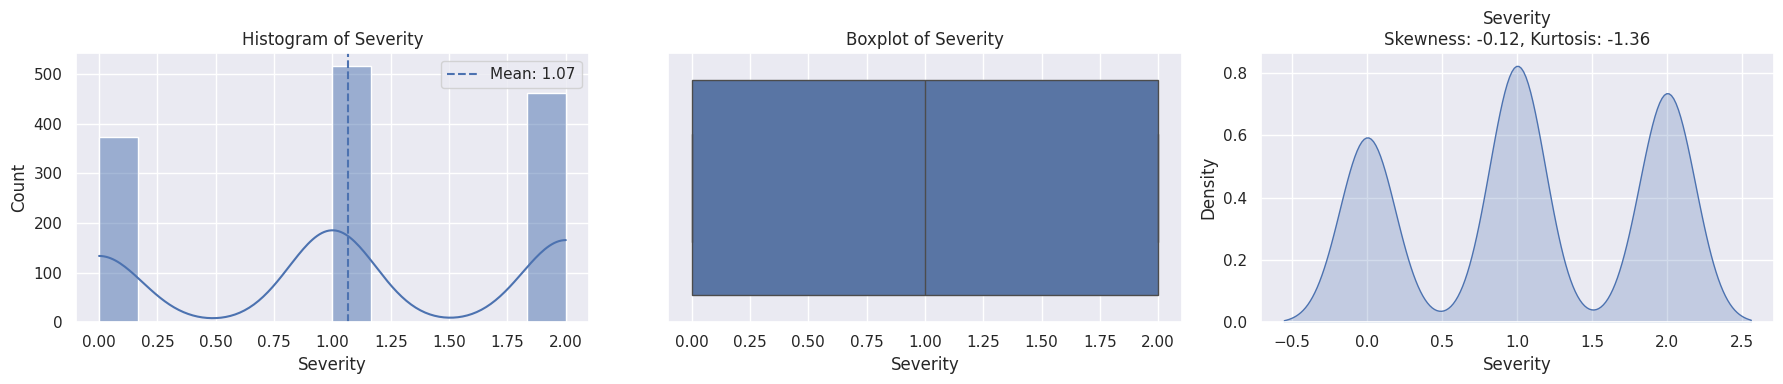

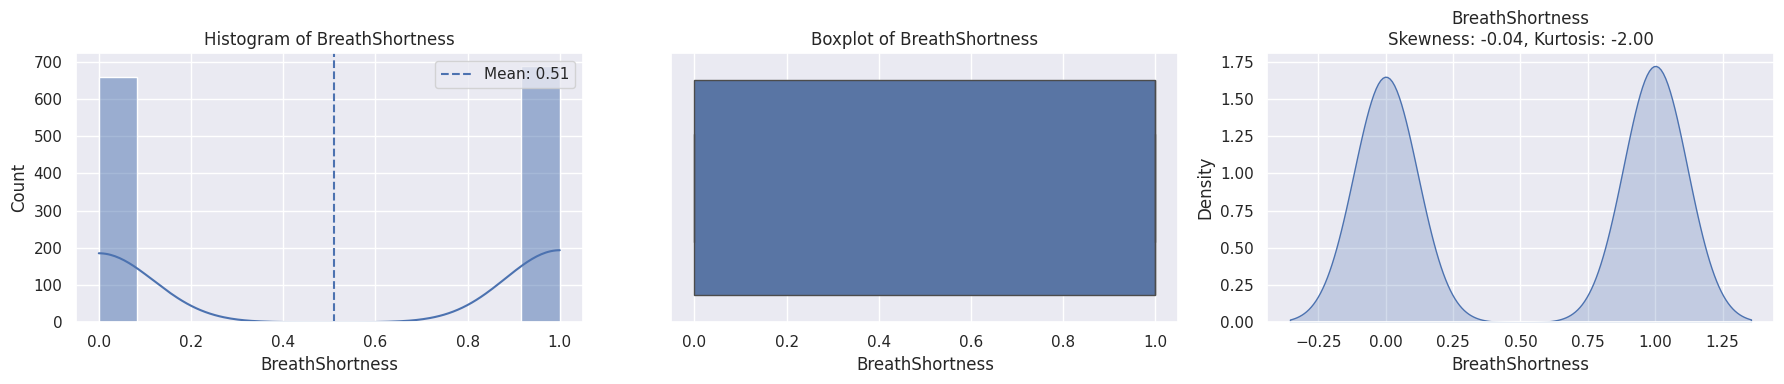

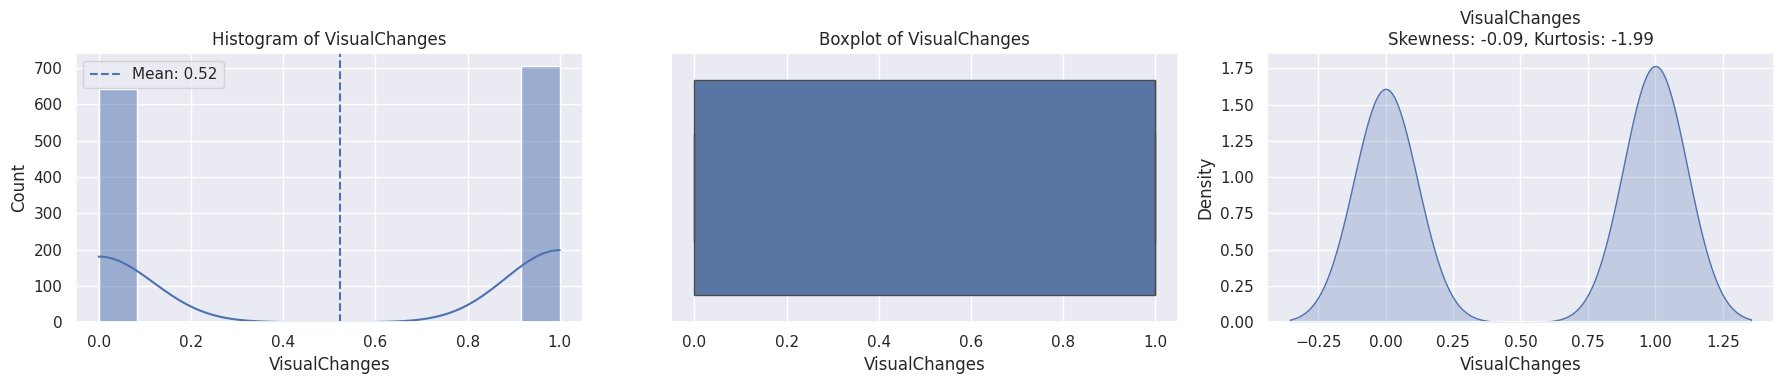

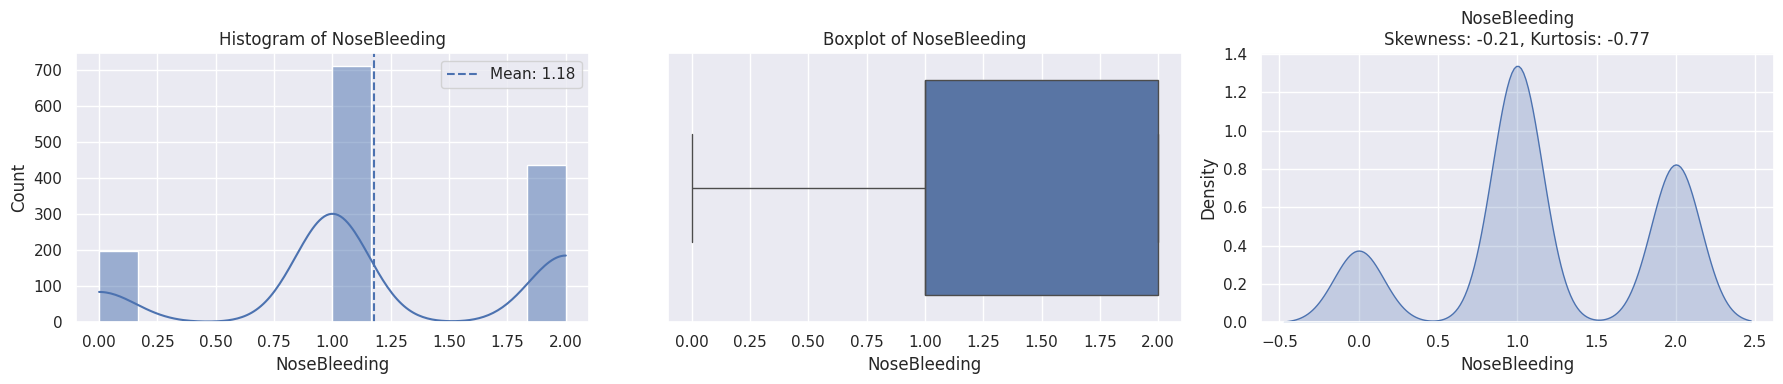

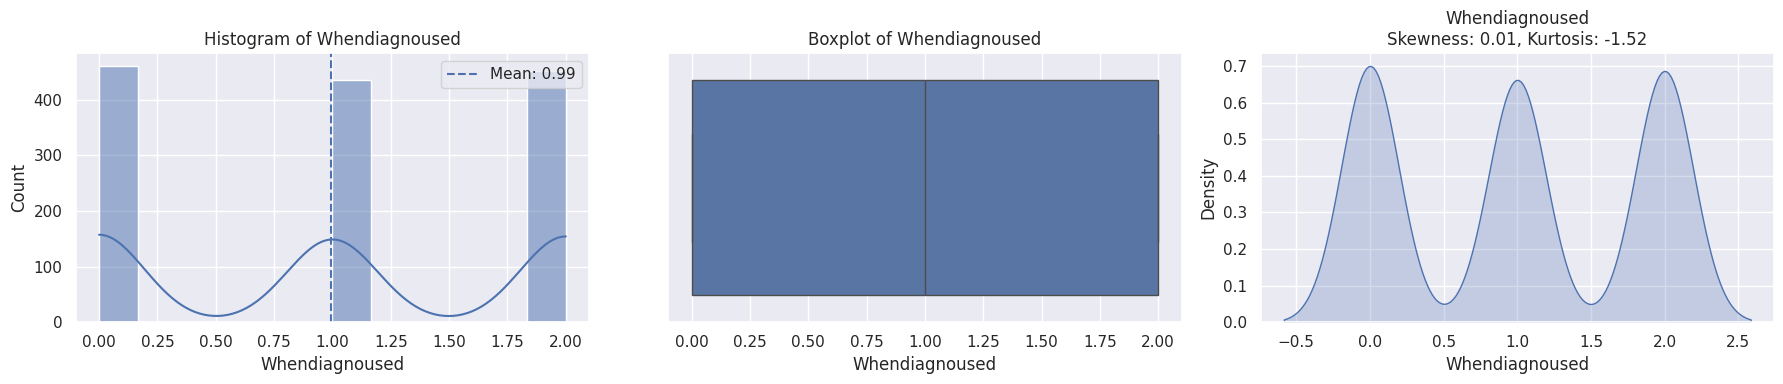

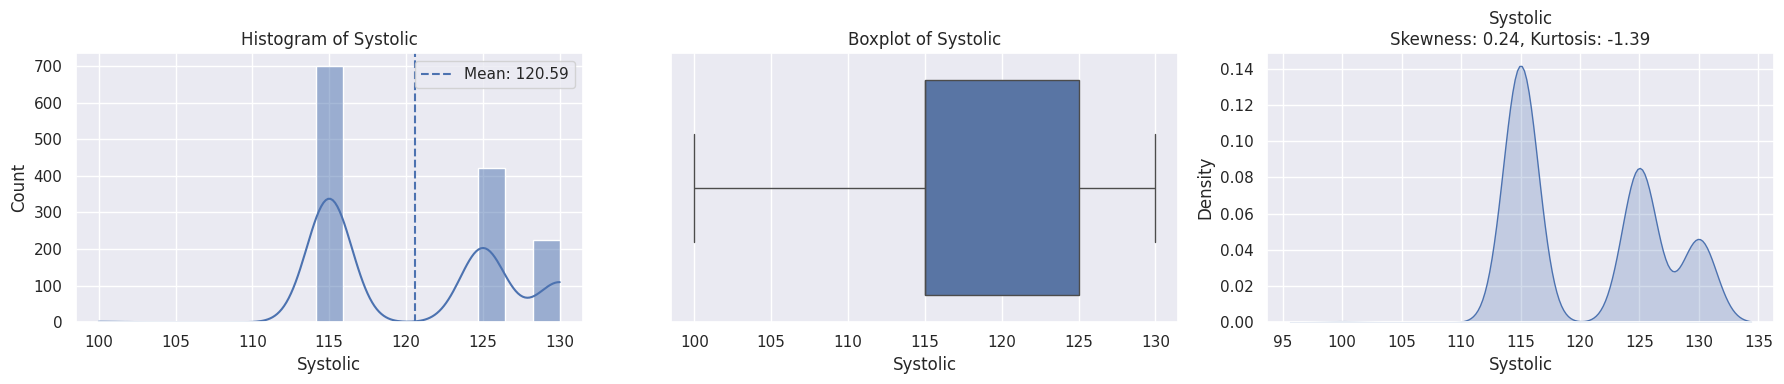

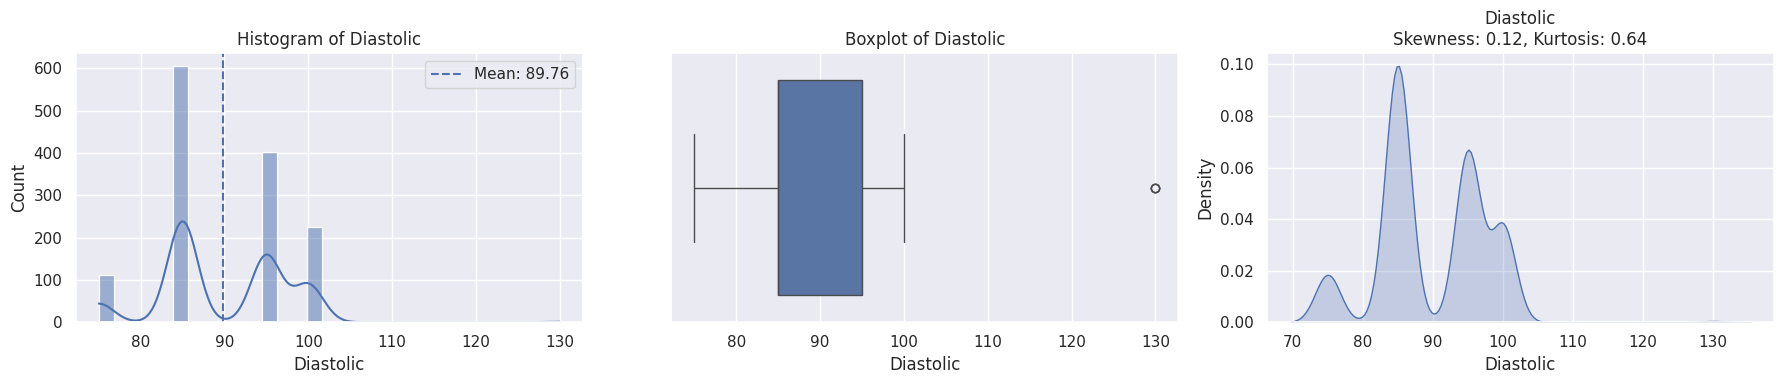

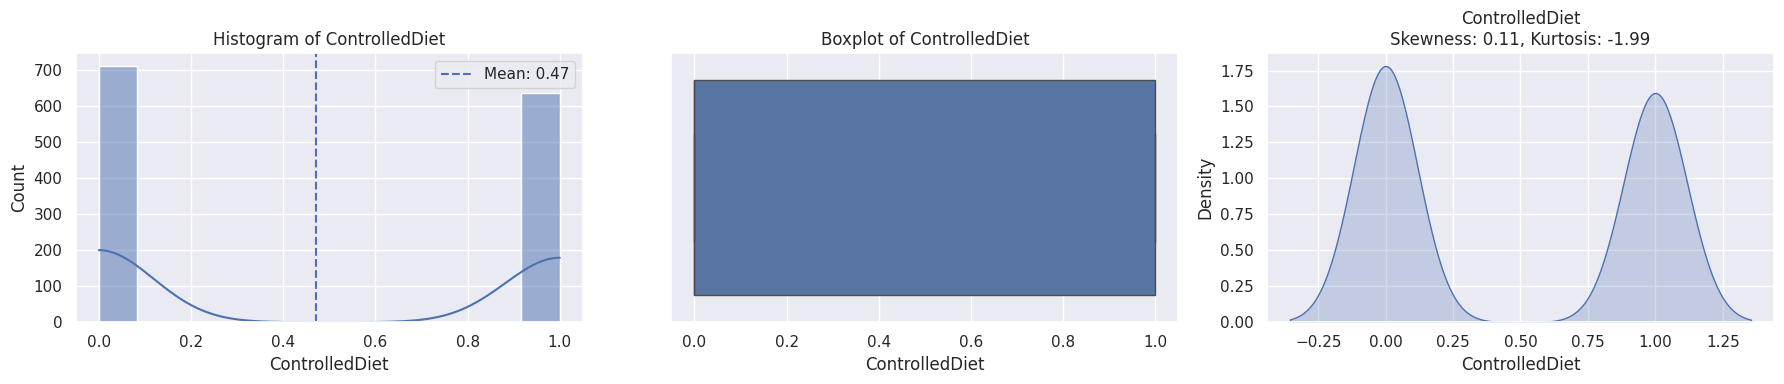

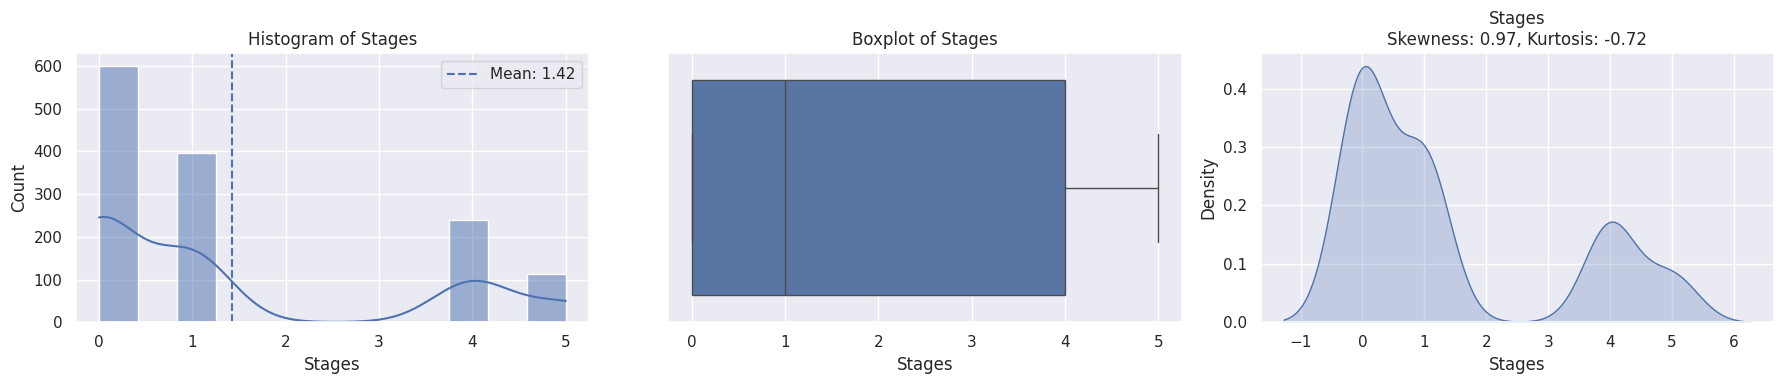

In [377]:
from scipy.stats import skew, kurtosis

# Automatically detect column types
cat_cols = df.select_dtypes(include='object').columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Univariate Analysis: Numerical Data with Mean, Skewness, Kurtosis
# -----------------------------
for col in num_cols:
    mean_val = df[col].mean()
    skew_val = skew(df[col].dropna())
    kurt_val = kurtosis(df[col].dropna())

    fig, axes = plt.subplots(1, 3, figsize=(18, 4))

    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].axvline(mean_val, linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[0].set_title(f'Histogram of {col}')
    axes[0].legend()

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')

    # KDE Plot with skew and kurtosis
    sns.kdeplot(df[col], ax=axes[2], shade=True,)
    axes[2].set_title(f'{col}\nSkewness: {skew_val:.2f}, Kurtosis: {kurt_val:.2f}')

    plt.tight_layout()
    plt.show()


BIVARIATE Analysis

**countplot**

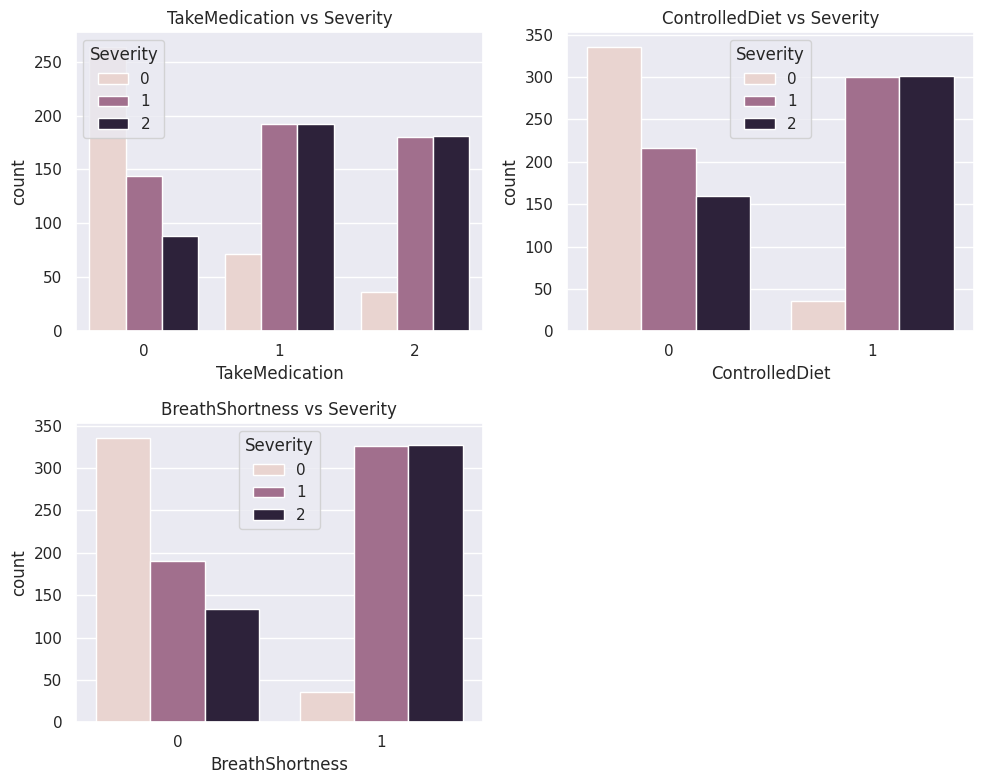

In [378]:
#Set consistent style
sns.set()

# List of columns to plot against 'Severity'
cols_to_plot = ['TakeMedication', 'ControlledDiet', 'BreathShortness']

# Calculate number of rows and columns for the grid
n_cols = 2  # Minimum 2 columns
n_rows = (len(cols_to_plot) + n_cols - 1) // n_cols # Calculate rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))
axes = axes.flatten() # Flatten the axes array for easy iteration

for i, col in enumerate(cols_to_plot):
    sns.countplot(x=col, hue='Severity', data=df, ax=axes[i])
    axes[i].set_title(f'{col} vs Severity')
    axes[i].tick_params(axis='x', rotation=0)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

boxplot

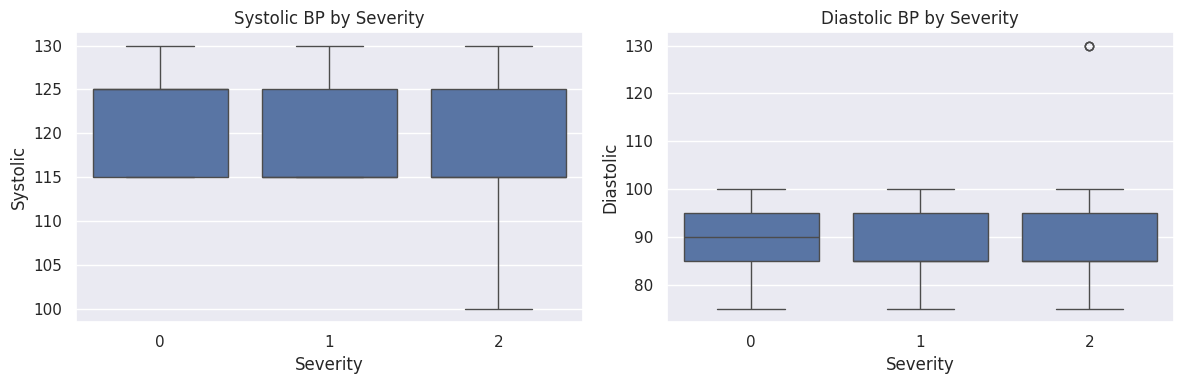

In [379]:
sns.set()

fig, axes = plt.subplots(1, 2, figsize=(12, 4)) # Create a figure with 1 row and 2 columns

sns.boxplot(x='Severity', y='Systolic', data=df, ax=axes[0])
axes[0].set_title('Systolic BP by Severity')

sns.boxplot(x='Severity', y='Diastolic', data=df, ax=axes[1])
axes[1].set_title('Diastolic BP by Severity')

plt.tight_layout()
plt.show()

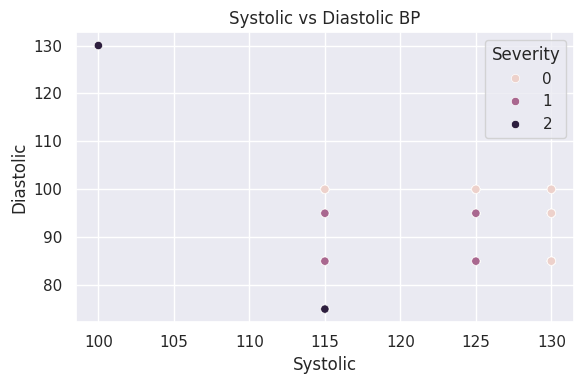

In [380]:
sns.set()
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Systolic', y='Diastolic', data=df, hue='Severity')
plt.title('Systolic vs Diastolic BP')
plt.tight_layout()
plt.show()

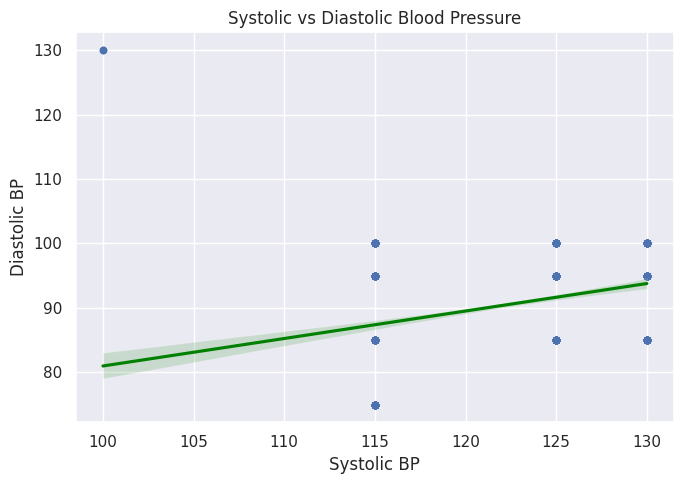

In [381]:
# Systolic vs Diastolic with regression line
plt.figure(figsize=(7, 5))
sns.regplot(x='Systolic', y='Diastolic', data=df, scatter_kws={'s': 20}, line_kws={'color': 'green'})

plt.title('Systolic vs Diastolic Blood Pressure')
plt.xlabel('Systolic BP')
plt.ylabel('Diastolic BP')
plt.tight_layout()
plt.show()

**....**

MULTIVARIATE

In [382]:
print(df.columns.tolist())

print(df['Age'].unique())
print(df['Systolic'].unique())
print(df['Diastolic'].unique())

['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity', 'BreathShortness', 'VisualChanges', 'NoseBleeding', 'Whendiagnoused', 'Systolic', 'Diastolic', 'ControlledDiet', 'Stages']
[26.  42.5 57.5 70. ]
[115 125 130 100]
[ 85  95 100 130  75]


In [386]:
# Mapping age #

In [384]:
print(df['Age'].unique())

[26.  42.5 57.5 70. ]


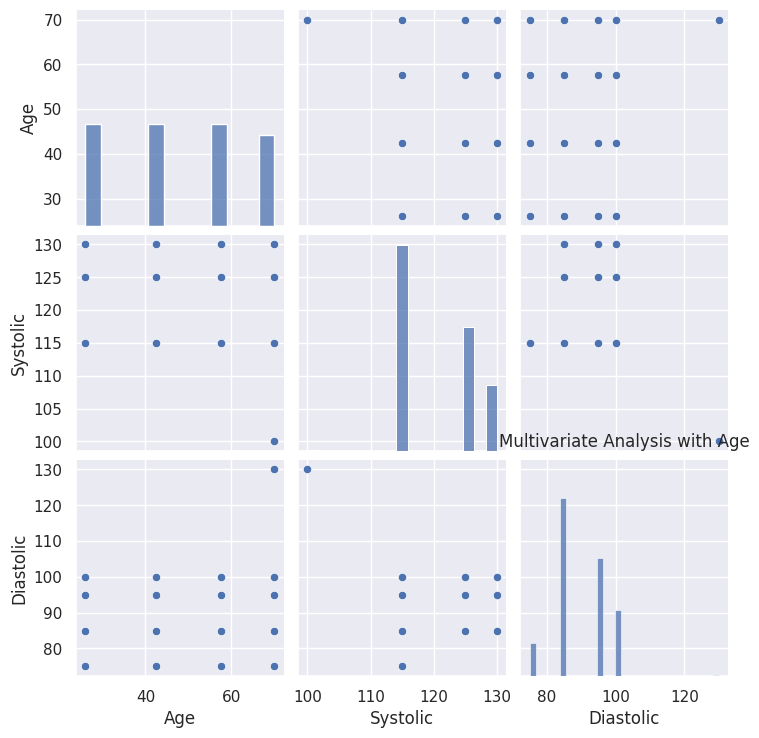

In [385]:
sns.pairplot(df[['Age', 'Systolic', 'Diastolic']])
plt.title("Multivariate Analysis with Age", y=1.02)
plt.show()


In [388]:
print(df.columns)

Index(['Gender', 'Age', 'History', 'Patient', 'TakeMedication', 'Severity',
       'BreathShortness', 'VisualChanges', 'NoseBleeding', 'Whendiagnoused',
       'Systolic', 'Diastolic', 'ControlledDiet', 'Stages'],
      dtype='object')


In [387]:
x=df.drop('Stages',axis=1)
x

,Gender,Age,History,Patient,TakeMedication,Severity,BreathShortness,VisualChanges,NoseBleeding,Whendiagnoused,Systolic,Diastolic,ControlledDiet
0,1,26.0,1,0,0,0,0,0,1,0,115,85,0
1,0,26.0,1,0,0,0,0,0,1,0,115,85,0
2,1,42.5,1,0,0,0,0,0,1,0,115,85,0
3,0,42.5,1,0,0,0,0,0,1,0,115,85,0
4,1,57.5,1,0,0,0,0,0,1,0,115,85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,0,42.5,1,0,0,2,0,0,1,2,115,75,0
1597,1,57.5,1,0,0,2,0,0,1,2,115,75,0
1598,0,57.5,1,0,0,2,0,0,1,2,115,75,0
1599,1,70.0,1,0,0,2,0,0,1,2,115,75,0


In [389]:
y=df['Stages']
y

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
1596,5
1597,5
1598,5
1599,5


In [390]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

MODEL BUILDING

Training and testing the models using multiple algorithms

Logistic Regression Model

In [391]:
df.isnull().sum()


,0
Gender,0
Age,0
History,0
Patient,0
TakeMedication,0
Severity,0
BreathShortness,0
VisualChanges,0
NoseBleeding,0
Whendiagnoused,0


In [392]:
print(df['Whendiagnoused'].value_counts(dropna=False))
print(df['Whendiagnoused'].isnull().sum())  # Should be 0


Whendiagnoused
0    461
2    452
1    436
Name: count, dtype: int64
0


In [393]:
print(df.Systolic.isnull().sum()/df.Systolic.shape[0]*100)
df['Systolic'].fillna(df['Systolic'].mode()[0],inplace=True)

0.0


In [394]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred = logistic_regression.predict(x_test)

acc_lr = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_lr)
c_lr=classification_report(y_test, y_pred)
print(c_lr)

Accuracy: 0.9962962962962963
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       109
           1       1.00      0.99      0.99        84
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        23

    accuracy                           1.00       270
   macro avg       1.00      1.00      1.00       270
weighted avg       1.00      1.00      1.00       270



Random Forest Regresser

In [395]:
from sklearn.ensemble import RandomForestClassifier
random_forest= RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)

y_pred = random_forest.predict(x_test)

acc_rf = accuracy_score(y_test, y_pred)
print("Accuracy:", acc_rf)
c_rf=classification_report(y_test, y_pred)
print(c_rf)

Accuracy: 0.9962962962962963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      0.99      0.99        84
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        23

    accuracy                           1.00       270
   macro avg       0.80      0.80      0.80       270
weighted avg       1.00      1.00      1.00       270



Decision Tree Model

In [396]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model= DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

acc_dt = accuracy_score(y_test, y_pred)
c_dt=classification_report(y_test, y_pred)
print("Accuracy Score:", acc_dt)

print(c_dt)

Accuracy Score: 0.9962962962962963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      0.99      0.99        84
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        23

    accuracy                           1.00       270
   macro avg       0.80      0.80      0.80       270
weighted avg       1.00      1.00      1.00       270



Gaussian Navies Bayes

In [397]:
from sklearn.naive_bayes import GaussianNB

NB=GaussianNB()
NB.fit(x_train, y_train)
y_pred = NB.predict(x_test)

acc_nb = accuracy_score(y_test, y_pred)
c_nb=classification_report(y_test, y_pred)
print("Accuracy Score:", acc_nb)

print(c_nb)

naive_bayes_model = GaussianNB()
naive_bayes_model.fit(x_train, y_train)

Accuracy Score: 0.9962962962962963
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      0.99      0.99        84
           2       0.00      0.00      0.00         0
           4       1.00      1.00      1.00        54
           5       1.00      1.00      1.00        23

    accuracy                           1.00       270
   macro avg       0.80      0.80      0.80       270
weighted avg       1.00      1.00      1.00       270



GaussianNB()

Multinomial Navies Bayes

In [398]:
from sklearn.naive_bayes import MultinomialNB

mNB=MultinomialNB()
mNB.fit(x_train, y_train)
y_pred = mNB.predict(x_test)

acc_mnb = accuracy_score(y_test, y_pred)
c_mnb=classification_report(y_test, y_pred)

print("Accuracy Score:", acc_mnb)

print(c_mnb)

multinomial_naive_bayes_model = MultinomialNB()
multinomial_naive_bayes_model.fit(x_train, y_train)

Accuracy Score: 0.8703703703703703
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       109
           1       0.82      0.99      0.90        84
           2       0.00      0.00      0.00         0
           4       1.00      0.70      0.83        54
           5       0.82      0.39      0.53        23

    accuracy                           0.87       270
   macro avg       0.70      0.61      0.63       270
weighted avg       0.88      0.87      0.86       270



MultinomialNB()

Testing The Model

In [399]:
prediction = random_forest.predict([[0,3,0,2,0,0,1,6,0,0,0,0,0]])

In [400]:
prediction[0]

np.int64(5)

# Performance testing and Hyper Parameter Tunning

Testing model with multiple evaluation metrics

In [401]:
model=pd.DataFrame({'Model':['Linear Regression','Decision Tree Classifier','Gaussian Navie Bayes','Random Forest Classifier','Multinomial Navie Bayes'],
                   'Score':[acc_lr,acc_dt,acc_rf,acc_nb,acc_mnb],
                    })

In [402]:
model

,Model,Score
0,Linear Regression,0.996296
1,Decision Tree Classifier,0.996296
2,Gaussian Navie Bayes,0.996296
3,Random Forest Classifier,0.996296
4,Multinomial Navie Bayes,0.870370


MODEL DEPLOYMENT

Save the best model

In [403]:
import pickle
import warnings
pickle.dump(random_forest,open("model.pkl","wb"))

Integrate with Web Framework


In [404]:
!pip install pyngrok


Building Html Pages

In [405]:
import os

# Create 'templates' directory
os.makedirs("Flask/templates", exist_ok=True)


In [406]:
with open("Flask/templates/index.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Blood Pressure Stage Predictor</title>
    <link href="https://fonts.googleapis.com/css2?family=Poppins&display=swap" rel="stylesheet">
    <style>
        body {
            font-family: 'Poppins', sans-serif;
            background: linear-gradient(to right, #e0f7fa, #e8eaf6); /* Lighter background */
            margin: 0;
            padding: 0;
        }
        .container {
            width: 80%;
            margin: auto;
            background-color: #ffffff; /* White background for the container */
            margin-top: 40px;
            padding: 40px;
            border-radius: 15px;
            box-shadow: 0 0 15px rgba(0,0,0,0.2);
        }
        h2 {
            text-align: center;
            color: red; /* Darker title color */
        }
        form {
            display: grid;
            grid-template-columns: repeat(2, 1fr);
            gap: 20px;
        }
        label {
            font-weight: bold;
        }
        input[type="text"], input[type="number"] {
            padding: 10px;
            border-radius: 8px;
            border: 1px solid #ccc;
            width: 90%;
        }
        .btn {
            grid-column: span 2;
            text-align: center;
        }
        input[type="submit"] {
            background-color: parrotgreen;
            color: black;
            padding: 10px 25px;
            border: none;
            border-radius: 8px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background-color: red;
        }
    </style>
</head>
<body>
<div class="container">
    <h2>Blood Pressure Stage Predictor</h2>
    <form action="/" method="POST">
        <div>
            <label>Gender:</label>
            <input type="text" name="Gender" required>
        </div>
        <div>
            <label>Age:</label>
            <input type="number" name="Age" required>
        </div>
        <div>
            <label>History:</label>
            <input type="text" name="History" required>
        </div>
        <div>
            <label>Patient:</label>
            <input type="text" name="Patient" required>
        </div>
        <div>
            <label>Take Medication:</label>
            <input type="text" name="TakeMedication" required>
        </div>
        <div>
            <label>Severity:</label>
            <input type="text" name="Severity" required>
        </div>
        <div>
            <label>Breath Shortness:</label>
            <input type="text" name="BreathShortness" required>
        </div>
        <div>
            <label>Visual Changes:</label>
            <input type="text" name="VisualChanges" required>
        </div>
        <div>
            <label>Nose Bleeding:</label>
            <input type="text" name="NoseBleeding" required>
        </div>
        <div>
            <label>When Diagnosed:</label>
            <input type="text" name="Whendiagnoused" required>
        </div>
        <div>
            <label>Systolic:</label>
            <input type="number" name="Systolic" required>
        </div>
        <div>
            <label>Diastolic:</label>
            <input type="number" name="Diastolic" required>
        </div>
        <div>
            <label>Controlled Diet:</label>
            <input type="text" name="ControlledDiet" required>
        </div>
        <div class="btn">
            <input type="submit" value="Predict">
        </div>
    </form>
</div>
</body>
</html>
    """)

In [407]:
with open("Flask/templates/result.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html>
<head><title>Result</title></head>
<body>
    <h2>Prediction Result</h2>
    <p>{{ prediction }}</p>
    <a href="/">Go back</a>
</body>
</html>
    """)


In [408]:
with open("Flask/app1.py", "w") as f:
    f.write("""
from flask import Flask, render_template, request
import joblib
import numpy as np
from flask_ngrok import run_with_ngrok

app = Flask(__name__)
run_with_ngrok(app)

model = joblib.load("model.pkl")

@app.route('/')
def home():
    return render_template('index.html')

@app.route('/predict', methods=['POST'])
def predict():
    try:
        Age = int(request.form['Age'])
        Gender = 1 if request.form['Gender'].lower() == 'male' else 0
        Systolic = int(request.form['Systolic'])
        Diastolic = int(request.form['Diastolic'])

        severity_map = {'Mild': 0, 'Moderate': 1, 'Sever': 2}
        Severity = severity_map.get(request.form['Severity'], 0)

        diag_map = {'<1 Year': 0, '1-5 Year': 1, '>5 Year': 2}
        Diagnosed = diag_map.get(request.form['Whendiagnoused'], 0)

        input_data = np.array([[Age, Gender, Systolic, Diastolic, Severity, Diagnosed]])
        prediction = model.predict(input_data)[0]

        return render_template('result.html', prediction=f"Predicted Stage: {prediction}")
    except Exception as e:
        return render_template('result.html', prediction=f"Error: {str(e)}")

if __name__ == '__main__':
    app.run()
    """)


In [409]:
import os
os.chdir('/content/Flask')
!ls  # confirm files


app1.py  Flask	model.pkl  templates


Building Python Code

In [410]:
!pip install flask_ngrok

In [411]:
import numpy as np
import pandas as pd
from flask import Flask,request,render_template
import joblib
import pickle
from pyngrok import ngrok

In [412]:
ngrok.set_auth_token("30ZdZDIGAYpPAoPDzDX88jAI4fB_3QYWt5217jeUmm4cwYGdu")

In [413]:
app=Flask(__name__,static_url_path='/Flask/static')
model=pickle.load(open('model.pkl','rb'))

In [414]:
import os
import pickle
from flask import Flask, render_template, request
import numpy as np
from pyngrok import ngrok
from flask_ngrok import run_with_ngrok # Import run_with_ngrok

# Load trained model
# Adjust model_path based on your environment (local or Colab)
model_path = "model.pkl"  # Default for local; change if in a subdirectory
if not os.path.exists(model_path):
    # For Colab, uncomment and adjust the path if needed
    # model_path = "/content/Flask/model.pkl"
    # if not os.path.exists(model_path):
    #     model_path = "/content/model.pkl"
    print(f"Error: model.pkl not found at {model_path}. Please ensure the model is saved correctly.")
    model = None  # Set model to None to handle the error gracefully
else:
    try:
        with open(model_path, 'rb') as file:
            model = pickle.load(file)
    except Exception as e:
        print(f"Error loading model: {e}")
        model = None

# Initialize Flask app
# Adjust template_folder for your environment
app = Flask(__name__, template_folder='templates')  # Use 'templates' for local; adjust for Colab if needed

# Define encoding functions
def encode_yes_no(value):
    return 1 if value.strip().lower() == "yes" else 0

def encode_gender(value):
    return 1 if value.strip().lower() == "male" else 0

def encode_severity(val):
    return {"mild": 0, "moderate": 1, "sever": 2}.get(val.strip().lower(), 0)

def encode_when(val):
    return {"<1 year": 0, "1-5 years": 1, ">5 years": 2}.get(val.strip().lower(), 0)

def encode_range(val):
    if not val or val.strip() == "":
        return 0
    val = str(val).strip()
    if "+" in val:
        try:
            return int(val.replace('+', '').strip())
        except ValueError:
            return 0
    elif "-" in val:
        try:
            nums = val.split('-')
            return (int(nums[0].strip()) + int(nums[1].strip())) // 2
        except ValueError:
            return 0
    else:
        try:
            return int(val)
        except ValueError:
            return 0

@app.route('/', methods=["GET", "POST"])
def home():
    prediction_text = None
    if request.method == "POST":
        if model is None:
            prediction_text = "Error: Model not loaded."
            return render_template('result.html', prediction=prediction_text)
        else:
            try:
                data = request.form
                gender = encode_gender(data['Gender'])
                age = int(data.get('Age', 0))  # Default to 0 if invalid
                history = encode_yes_no(data['History'])
                patient = encode_yes_no(data['Patient'])
                med = encode_yes_no(data['TakeMedication'])
                severity = encode_severity(data['Severity'])
                breath = encode_yes_no(data['BreathShortness'])
                visual = encode_yes_no(data['VisualChanges'])
                nose = encode_yes_no(data['NoseBleeding'])
                when = encode_when(data['Whendiagnoused'])
                sys = encode_range(data['Systolic'])
                dia = encode_range(data['Diastolic'])
                diet = encode_yes_no(data['ControlledDiet'])

                features = np.array([[gender, age, history, patient, med, severity,
                                    breath, visual, nose, when, sys, dia, diet]])

                predicted_stage_encoded = model.predict(features)[0]

                # Stage decoding map based on value counts in notebook
                stage_decode_map = {
                    0: 'HYPERTENSION (Stage-1)',
                    1: 'HYPERTENSION (Stage-2)',
                    2: 'HYPERTENSIVE CRISIS',
                    3: 'NORMAL',  # Based on value counts: Stages 0, 1, 4, 5 seen, 2, 3 have very low counts. Re-mapping 4 and 5 to Normal
                    4: 'NORMAL',
                    5: 'NORMAL'
                }

                predicted_stage_label = stage_decode_map.get(predicted_stage_encoded,
                                                          f"Unknown Stage ({predicted_stage_encoded})")

                prediction_text = f"Predicted Blood Pressure Stage: {predicted_stage_label}"
                return render_template('result.html', prediction=prediction_text)

            except Exception as e:
                prediction_text = f"Error during prediction: {e}"
                return render_template('result.html', prediction=prediction_text)

    return render_template('index.html', prediction=prediction_text)


# Run app
if __name__ == '__main__':
    # Set ngrok auth token (replace with your actual token)
    ngrok.set_auth_token("30ZdZDIGAYpPAoPDzDX88jAI4fB_3QYWt5217jeUmm4cwYGdu")

    # Start ngrok tunnel
    public_url = ngrok.connect(5000).public_url
    print(f" * ngrok tunnel is running at {public_url}")

    # Run the Flask app
    app.run()

 * ngrok tunnel is running at https://6a1489f8ed80.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [06/Aug/2025 16:29:59] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [06/Aug/2025 16:30:00] "GET /favicon.ico HTTP/1.1" 404 -
